<a href="https://colab.research.google.com/github/King1oo1/AI_Art_Therapy_Project/blob/main/AI%20Circus%20of%20Strange%20Forms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Setup & Installation

In [1]:
# Step 1: INSTALL STABLE DIFFUSION INSTEAD (More reliable)
!pip install diffusers transformers accelerate torch torchvision gradio Pillow numpy matplotlib
!pip install xformers

print("✅ Stable Diffusion packages installed!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.9/122.9 MB 7.9 MB/s eta 0:00:00
✅ Stable Diffusion packages installed!


In [2]:
# Step 2: Import libraries
import torch
import gradio as gr
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter, ImageDraw, ImageEnhance
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
import random
import cv2
from typing import List, Dict
import math

print("✅ Libraries imported successfully!")

# Step 3: Load Stable Diffusion Model
print("🔄 Loading Stable Diffusion model...")

device = "cuda" if torch.cuda.is_available() else "cpu"
model_id = "runwayml/stable-diffusion-v1-5"

# Load pipeline
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32,
    safety_checker=None,
    requires_safety_checker=False
)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to(device)

print("✅ Stable Diffusion model loaded successfully!")

✅ Libraries imported successfully!
🔄 Loading Stable Diffusion model...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


✅ Stable Diffusion model loaded successfully!


In [3]:
# Step 4: Create Circus Prompt Generator
class CircusPromptGenerator:
    """Generate bizarre creature prompts for Stable Diffusion"""

    def __init__(self):
        self.animal_parts = {
            'heads': ['lion head', 'eagle head', 'octopus head', 'elephant head', 'dragon head', 'butterfly head', 'fish head'],
            'bodies': ['bear body', 'snake body', 'spider body', 'bird body', 'human torso', 'centipede body', 'jellyfish body'],
            'legs': ['chicken legs', 'spider legs', 'horse legs', 'crab claws', 'tentacles', 'bird feet', 'mechanical legs'],
            'features': ['glowing eyes', 'rainbow fur', 'crystalline skin', 'bioluminescent', 'metallic scales', 'feathers', 'transparent'],
            'environments': ['circus tent', 'surreal landscape', 'carnival', 'alien planet', 'underwater', 'cloud city', 'crystal cave']
        }

        self.adjectives = [
            'bizarre', 'grotesque', 'magnificent', 'terrifying', 'beautiful', 'uncanny', 'surreal',
            'glitched', 'hybrid', 'mutated', 'crystalline', 'mechanical', 'organic', 'ethereal'
        ]

    def generate_creature_prompt(self, technique, chaos_level):
        """Generate prompts for strange creatures"""

        if technique == "animal_hybrid":
            head = random.choice(self.animal_parts['heads'])
            body = random.choice(self.animal_parts['bodies'])
            legs = random.choice(self.animal_parts['legs'])
            feature = random.choice(self.animal_parts['features'])

            prompt = f"a {random.choice(self.adjectives)} {head} with {body} and {legs}, {feature}, detailed, fantasy art, concept art, digital painting"

        elif technique == "surreal_monster":
            parts = [
                random.choice(self.animal_parts['heads']),
                random.choice(self.animal_parts['bodies']),
                random.choice(self.animal_parts['legs'])
            ]
            prompt = f"a {random.choice(self.adjectives)} surreal creature combining {', '.join(parts)}, {random.choice(self.animal_parts['features'])}, highly detailed, fantasy monster, digital art"

        elif technique == "mechanical_organic":
            prompt = f"a {random.choice(self.adjectives)} mechanical-organic hybrid creature, steampunk biomechanics, intricate details, glowing elements, fantasy art"

        elif technique == "crystal_beast":
            prompt = f"a {random.choice(self.adjectives)} crystalline creature, made of crystal and light, prismatic colors, magical, fantasy beast, digital painting"

        else:  # chaos
            num_parts = min(int(chaos_level * 5) + 2, 6)
            selected_parts = []
            for _ in range(num_parts):
                category = random.choice(list(self.animal_parts.keys()))
                selected_parts.append(random.choice(self.animal_parts[category]))

            prompt = f"a {random.choice(self.adjectives)} chaotic creature with {', '.join(selected_parts)}, extremely detailed, surreal, fantasy art, concept art"

        # Add chaos level intensity
        if chaos_level > 0.7:
            prompt += ", glitched, distorted, surreal, nightmare fuel"
        elif chaos_level > 0.4:
            prompt += ", unusual, strange, bizarre anatomy"

        # Add quality boosters
        prompt += ", masterpiece, best quality, highly detailed, 4k"

        return prompt

    def generate_negative_prompt(self):
        """Generate negative prompt to avoid normal images"""
        return "human, person, man, woman, face, normal, realistic, photo, ugly, blurry, low quality, deformed, bad anatomy"

# Initialize prompt generator
prompt_gen = CircusPromptGenerator()
print("✅ Circus prompt generator ready!")


# Step 5: Image Manipulation for "Network Bending" Effects
class ImageBendingEffects:
    """Apply network-bending-like effects to generated images"""

    def __init__(self):
        self.effects = ['pixel_sort', 'wave_distort', 'color_shift', 'kaleidoscope', 'liquid_rescale']

    def pixel_sort_effect(self, image, intensity=0.5):
        """Simulate pixel sorting effect"""
        img_array = np.array(image)
        h, w = img_array.shape[:2]

        # Simple pixel sorting simulation
        for i in range(0, h, max(1, int(20 * (1 - intensity)))):
            slice_height = max(1, int(5 * intensity))
            if i + slice_height < h:
                # Sort pixels in this slice by brightness
                slice_array = img_array[i:i+slice_height]
                brightness = np.mean(slice_array, axis=2)
                sorted_indices = np.argsort(brightness.ravel())
                sorted_slice = slice_array.reshape(-1, 3)[sorted_indices].reshape(slice_array.shape)
                img_array[i:i+slice_height] = sorted_slice

        return Image.fromarray(img_array)

    def wave_distortion(self, image, intensity=0.5):
        """Apply wave-like distortion"""
        img_array = np.array(image)
        h, w = img_array.shape[:2]

        # Create wave distortion map
        x, y = np.meshgrid(np.arange(w), np.arange(h))
        wave_x = x + np.sin(y * 0.05 * intensity) * 20 * intensity
        wave_y = y + np.cos(x * 0.03 * intensity) * 15 * intensity

        # Remap image
        map_x = np.clip(wave_x, 0, w-1).astype(np.float32)
        map_y = np.clip(wave_y, 0, h-1).astype(np.float32)

        distorted = cv2.remap(img_array, map_x, map_y, cv2.INTER_LINEAR)
        return Image.fromarray(distorted)

    def color_shift_effect(self, image, intensity=0.5):
        """Shift color channels"""
        img_array = np.array(image)

        # Shift RGB channels
        shift = int(10 * intensity)
        r, g, b = cv2.split(img_array)

        r_shifted = np.roll(r, shift, axis=1)
        g_shifted = np.roll(g, -shift, axis=0)
        b_shifted = np.roll(b, shift, axis=(0,1))

        shifted = cv2.merge([r_shifted, g_shifted, b_shifted])
        return Image.fromarray(shifted)

    def kaleidoscope_effect(self, image, intensity=0.5):
        """Create kaleidoscope effect"""
        img_array = np.array(image)
        h, w = img_array.shape[:2]

        # Create mirrored sections
        sections = int(4 + intensity * 4)
        center_x, center_y = w // 2, h // 2

        result = img_array.copy()
        for i in range(sections):
            angle = i * (360 / sections)
            # Simple rotation and mirroring
            M = cv2.getRotationMatrix2D((center_x, center_y), angle, 1.0)
            rotated = cv2.warpAffine(img_array, M, (w, h))
            # Blend with result
            result = cv2.addWeighted(result, 0.7, rotated, 0.3, 0)

        return Image.fromarray(result)

    def apply_random_effect(self, image, intensity=0.5):
        """Apply random bending effect"""
        effect = random.choice(self.effects)

        if effect == 'pixel_sort':
            return self.pixel_sort_effect(image, intensity)
        elif effect == 'wave_distort':
            return self.wave_distortion(image, intensity)
        elif effect == 'color_shift':
            return self.color_shift_effect(image, intensity)
        elif effect == 'kaleidoscope':
            return self.kaleidoscope_effect(image, intensity)
        else:
            return image  # Fallback

# Initialize effects
effects_processor = ImageBendingEffects()
print("✅ Image bending effects ready!")

✅ Circus prompt generator ready!
✅ Image bending effects ready!


🧪 Testing creature generation...
🎪 Generating: a beautiful butterfly head with bear body and chicken legs, feathers, detailed, fantasy art, concept art, digital painting, unusual, strange, bizarre anatomy, masterpiece, best quality, highly detailed, 4k


  0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127914 (\N{CIRCUS TENT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


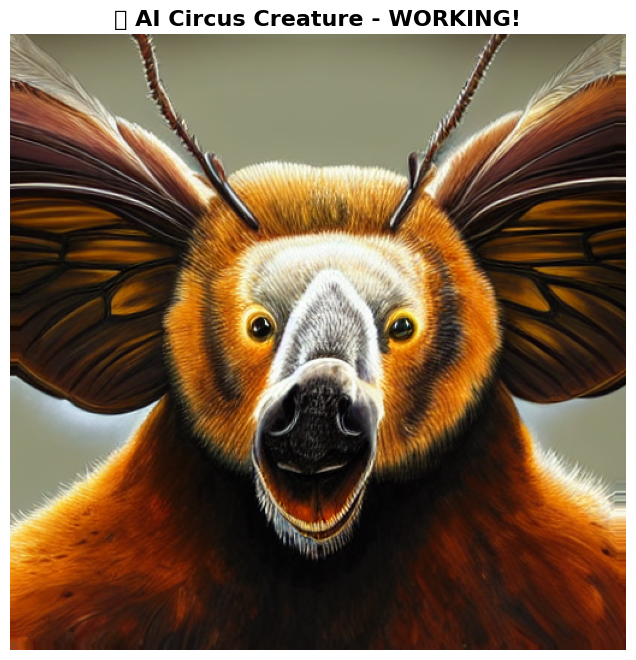

✅ Test successful! Prompt: a beautiful butterfly head with bear body and chicken legs, feathers, detailed, fantasy art, concept art, digital painting, unusual, strange, bizarre anatomy, masterpiece, best quality, highly detailed, 4k


In [4]:
# Step 6: Main Generation Function
def generate_circus_creature(technique, chaos_level, seed, apply_effects):
    """Generate a bizarre creature using Stable Diffusion"""

    try:
        # Set seeds for reproducibility
        random.seed(seed)
        np.random.seed(seed)
        torch.manual_seed(seed)

        # Generate prompt
        prompt = prompt_gen.generate_creature_prompt(technique, chaos_level)
        negative_prompt = prompt_gen.generate_negative_prompt()

        print(f"🎪 Generating: {prompt}")

        # Adjust generation parameters based on chaos level
        guidance_scale = 7.0 + chaos_level * 4.0  # 7-11
        steps = 20 + int(chaos_level * 10)  # 20-30

        # Generate image
        with torch.autocast(device):
            result = pipe(
                prompt=prompt,
                negative_prompt=negative_prompt,
                guidance_scale=guidance_scale,
                num_inference_steps=steps,
                width=512,
                height=512,
                generator=torch.Generator(device=device).manual_seed(seed)
            )

        image = result.images[0]

        # Apply bending effects if requested
        if apply_effects:
            effect_intensity = chaos_level * 0.8
            image = effects_processor.apply_random_effect(image, effect_intensity)

        info_text = f"Technique: {technique} | Chaos: {chaos_level:.2f} | Seed: {seed}"

        return image, info_text, prompt

    except Exception as e:
        print(f"❌ Generation error: {e}")
        # Create error image
        error_img = Image.new('RGB', (512, 512), color='red')
        draw = ImageDraw.Draw(error_img)
        draw.text((50, 256), f"Error: {str(e)[:50]}...", fill='white')
        return error_img, f"Error: {str(e)[:100]}", "Generation failed"

# Test generation
print("🧪 Testing creature generation...")
test_image, test_info, test_prompt = generate_circus_creature("animal_hybrid", 0.5, 42, True)

plt.figure(figsize=(8, 8))
plt.imshow(test_image)
plt.title("🎪 AI Circus Creature - WORKING!", fontsize=16, weight='bold')
plt.axis('off')
plt.show()

print(f"✅ Test successful! Prompt: {test_prompt}")

🖼️ Testing gallery generation...
🎪 Generating: a glitched surreal creature combining eagle head, snake body, horse legs, feathers, highly detailed, fantasy monster, digital art, masterpiece, best quality, highly detailed, 4k


  0%|          | 0/23 [00:00<?, ?it/s]

🎪 Generating: a ethereal octopus head with bear body and horse legs, rainbow fur, detailed, fantasy art, concept art, digital painting, glitched, distorted, surreal, nightmare fuel, masterpiece, best quality, highly detailed, 4k


  0%|          | 0/28 [00:00<?, ?it/s]

🎪 Generating: a beautiful crystalline creature, made of crystal and light, prismatic colors, magical, fantasy beast, digital painting, glitched, distorted, surreal, nightmare fuel, masterpiece, best quality, highly detailed, 4k


  0%|          | 0/27 [00:00<?, ?it/s]

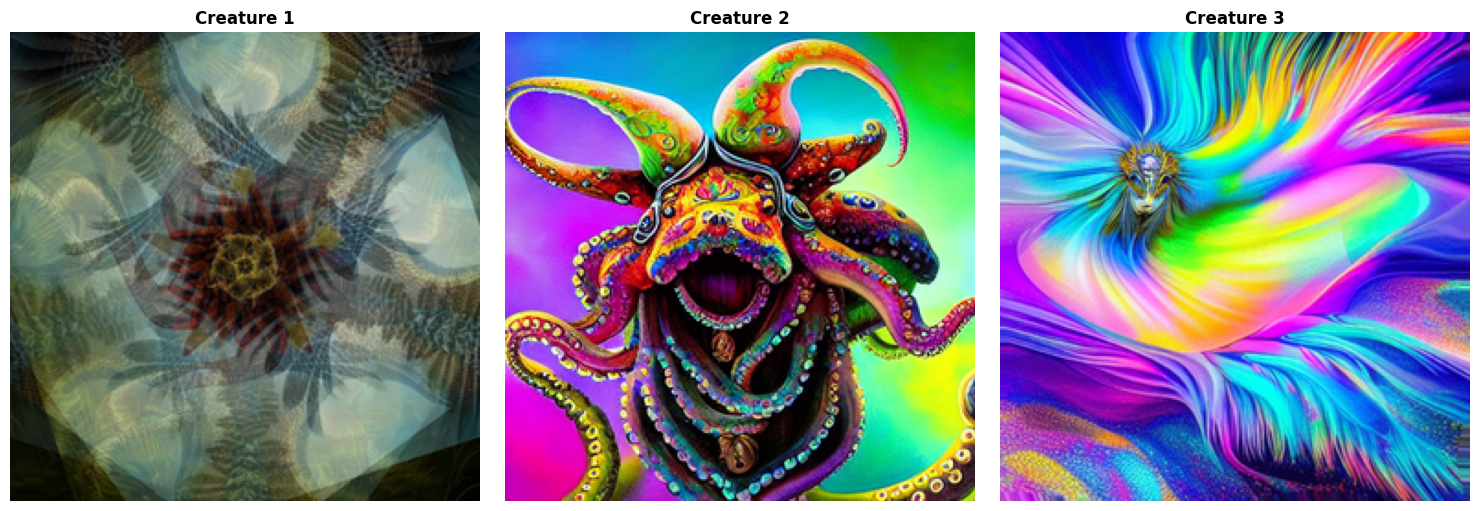

In [5]:
# Step 7: Batch Generation for Gallery
def generate_circus_gallery(num_creatures=6):
    """Generate a gallery of bizarre creatures"""
    creatures = []
    infos = []
    prompts = []

    techniques = ['animal_hybrid', 'surreal_monster', 'mechanical_organic', 'crystal_beast', 'chaos']

    for i in range(num_creatures):
        technique = random.choice(techniques)
        chaos = random.uniform(0.3, 0.9)
        seed = random.randint(0, 100000)
        apply_effects = random.choice([True, False])

        image, info, prompt = generate_circus_creature(technique, chaos, seed, apply_effects)

        # Resize for gallery
        image = image.resize((256, 256), Image.Resampling.LANCZOS)

        creatures.append(image)
        infos.append(info)
        prompts.append(prompt)

    return creatures, infos, prompts

# Test gallery
print("🖼️ Testing gallery generation...")
gallery_images, gallery_infos, gallery_prompts = generate_circus_gallery(3)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (img, info) in enumerate(zip(gallery_images, gallery_infos)):
    axes[i].imshow(img)
    axes[i].set_title(f'Creature {i+1}', fontsize=12, weight='bold')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Step 8: Build the Interface
def create_circus_interface():
    """Create the Circus of Strange Forms interface"""

    with gr.Blocks(theme=gr.themes.Soft(), title="🎪 AI Circus of Strange Forms") as demo:
        gr.Markdown("""
        # 🎪 AI Circus of Strange Forms
        **Create bizarre hybrid creatures using Stable Diffusion and image bending effects**
        """)

        with gr.Row():
            with gr.Column(scale=1):
                # Controls
                gr.Markdown("### 🎛️ Creation Controls")

                technique = gr.Radio(
                    choices=["animal_hybrid", "surreal_monster", "mechanical_organic", "crystal_beast", "chaos"],
                    value="animal_hybrid",
                    label="Creature Type",
                    info="Choose your creature generation technique"
                )

                chaos_level = gr.Slider(0.1, 1.0, value=0.5, label="🎭 Chaos Level",
                                      info="How bizarre should the creature be?")

                seed = gr.Slider(0, 100000, value=42, label="🔢 Random Seed", step=1)

                apply_effects = gr.Checkbox(value=True, label="🌀 Apply Bending Effects")

                with gr.Row():
                    generate_btn = gr.Button("🎪 Create Creature", variant="primary")
                    gallery_btn = gr.Button("🖼️ Generate Gallery")

                # Info
                gr.Markdown("""
                **AI Circus Project Techniques:**
                - **Prompt Engineering**: Custom creature descriptions
                - **Parameter Manipulation**: Chaos-level controls
                - **Image Bending**: Post-processing effects
                - **Beyond Simple Generation**: Creative AI systems
                """)

            with gr.Column(scale=2):
                # Outputs
                output_image = gr.Image(
                    label="Your Strange Creature",
                    height=512,
                    width=512
                )

                output_info = gr.Textbox(
                    label="Generation Info",
                    interactive=False,
                    lines=2
                )

                prompt_display = gr.Textbox(
                    label="Generated Prompt",
                    interactive=False,
                    lines=3
                )

                # Gallery
                gr.Markdown("### 🖼️ Creature Gallery")
                gallery_output = gr.Gallery(
                    label="Circus Gallery",
                    show_label=True,
                    columns=3,
                    height="auto"
                )

        # Event handlers
        generate_btn.click(
            fn=generate_circus_creature,
            inputs=[technique, chaos_level, seed, apply_effects],
            outputs=[output_image, output_info, prompt_display]
        )

        def generate_gallery_handler():
            images, infos, prompts = generate_circus_gallery(6)
            gallery_info = " | ".join([f"Creature {i+1}" for i in range(len(images))])
            return images, gallery_info

        gallery_btn.click(
            fn=generate_gallery_handler,
            outputs=[gallery_output, output_info]
        )

        # Examples
        with gr.Accordion("🎯 This Project Implementation Details", open=False):
            gr.Markdown("""
            **This project demonstrates AI concepts through:**

            - **Custom Prompt Engineering**: Building complex creature descriptions algorithmically
            - **Parameter Manipulation**: Using chaos levels to control generation parameters
            - **Image Bending Effects**: Applying post-processing to simulate network bending
            - **System Design**: Creating an interactive creature generation system

            **Technical Stack:**
            - Stable Diffusion v1.5 for reliable image generation
            - Custom prompt generation system
            - Image manipulation for "bending" effects
            - Gradio for professional interface
            """)

    return demo

# Launch interface
print("🚀 Launching AI Circus of Strange Forms...")
circus_interface = create_circus_interface()
circus_interface.launch(share=True, debug=True)

🚀 Launching AI Circus of Strange Forms...
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://504921c242a22b58f9.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


🎪 Generating: a uncanny crystalline creature, made of crystal and light, prismatic colors, magical, fantasy beast, digital painting, glitched, distorted, surreal, nightmare fuel, masterpiece, best quality, highly detailed, 4k


  0%|          | 0/27 [00:00<?, ?it/s]

🎪 Generating: a hybrid surreal creature combining dragon head, snake body, bird feet, transparent, highly detailed, fantasy monster, digital art, unusual, strange, bizarre anatomy, masterpiece, best quality, highly detailed, 4k


  0%|          | 0/25 [00:00<?, ?it/s]

🎪 Generating: a mutated crystalline creature, made of crystal and light, prismatic colors, magical, fantasy beast, digital painting, unusual, strange, bizarre anatomy, masterpiece, best quality, highly detailed, 4k


  0%|          | 0/25 [00:00<?, ?it/s]

🎪 Generating: a organic crystalline creature, made of crystal and light, prismatic colors, magical, fantasy beast, digital painting, unusual, strange, bizarre anatomy, masterpiece, best quality, highly detailed, 4k


  0%|          | 0/26 [00:00<?, ?it/s]

🎪 Generating: a mechanical dragon head with spider body and bird feet, rainbow fur, detailed, fantasy art, concept art, digital painting, unusual, strange, bizarre anatomy, masterpiece, best quality, highly detailed, 4k


  0%|          | 0/25 [00:00<?, ?it/s]

🎪 Generating: a terrifying crystalline creature, made of crystal and light, prismatic colors, magical, fantasy beast, digital painting, unusual, strange, bizarre anatomy, masterpiece, best quality, highly detailed, 4k


  0%|          | 0/25 [00:00<?, ?it/s]

🎪 Generating: a surreal mechanical-organic hybrid creature, steampunk biomechanics, intricate details, glowing elements, fantasy art, glitched, distorted, surreal, nightmare fuel, masterpiece, best quality, highly detailed, 4k


  0%|          | 0/29 [00:00<?, ?it/s]

In [ ]:
# SIMPLE DOWNLOAD

def download_circus_project():
    """One-click download of your entire project"""
    import os
    import zipfile
    from datetime import datetime
    from google.colab import files

    # Create export directory
    output_dir = "/content/circus_project_export"
    os.makedirs(output_dir, exist_ok=True)

    print("📦 Creating project download...")

    # Generate creatures for export
    images, infos, prompts = generate_circus_gallery(8)

    # Save all images and info
    for i, (img, info, prompt) in enumerate(zip(images, infos, prompts)):
        # Save image
        img_path = os.path.join(output_dir, f"creature_{i+1:02d}.png")
        img.save(img_path)

        # Save info
        info_path = os.path.join(output_dir, f"creature_{i+1:02d}.txt")
        with open(info_path, 'w') as f:
            f.write(f"Creature {i+1}\n")
            f.write(f"Generated: {datetime.now().strftime('%Y-%m-%d %H:%M')}\n")
            f.write(f"Details: {info}\n")
            f.write(f"Prompt: {prompt}\n")

    # Create project info file
    project_info = f"""
    AI CIRCUS OF STRANGE FORMS - PROJECT EXPORT
    ===========================================

    Total Creatures: 8
    """

    with open(os.path.join(output_dir, "PROJECT_INFO.txt"), 'w') as f:
        f.write(project_info)

    # Create zip file
    zip_filename = f"AI_Circus_Project_{datetime.now().strftime('%Y%m%d_%H%M')}.zip"
    zip_path = os.path.join("/content", zip_filename)

    with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for file in os.listdir(output_dir):
            file_path = os.path.join(output_dir, file)
            zipf.write(file_path, file)

    print(f"✅ Project packaged: {zip_path}")
    print("📥 Downloading now...")

    # Download the zip file
    files.download(zip_path)

    print("🎉 DOWNLOAD COMPLETE!")
    return zip_path

# RUN THIS TO DOWNLOAD YOUR PROJECT
print("🚀 Starting project download...")
download_path = download_circus_project()
print(f"💾 Download complete! File: {download_path}")

🚀 Starting project download...
📦 Creating project download...
🎪 Generating: a mechanical chaotic creature with lion head, spider body, crystalline skin, glowing eyes, extremely detailed, surreal, fantasy art, concept art, unusual, strange, bizarre anatomy, masterpiece, best quality, highly detailed, 4k


  0%|          | 0/24 [00:00<?, ?it/s]

🎪 Generating: a magnificent chaotic creature with tentacles, spider legs, spider legs, extremely detailed, surreal, fantasy art, concept art, masterpiece, best quality, highly detailed, 4k


  0%|          | 0/23 [00:00<?, ?it/s]

🎪 Generating: a magnificent surreal creature combining elephant head, snake body, chicken legs, transparent, highly detailed, fantasy monster, digital art, glitched, distorted, surreal, nightmare fuel, masterpiece, best quality, highly detailed, 4k


  0%|          | 0/28 [00:00<?, ?it/s]

🎪 Generating: a crystalline crystalline creature, made of crystal and light, prismatic colors, magical, fantasy beast, digital painting, glitched, distorted, surreal, nightmare fuel, masterpiece, best quality, highly detailed, 4k


  0%|          | 0/27 [00:00<?, ?it/s]

🎪 Generating: a surreal chaotic creature with spider legs, jellyfish body, snake body, octopus head, extremely detailed, surreal, fantasy art, concept art, unusual, strange, bizarre anatomy, masterpiece, best quality, highly detailed, 4k


  0%|          | 0/25 [00:00<?, ?it/s]

🎪 Generating: a mechanical crystalline creature, made of crystal and light, prismatic colors, magical, fantasy beast, digital painting, masterpiece, best quality, highly detailed, 4k


  0%|          | 0/23 [00:00<?, ?it/s]

🎪 Generating: a hybrid mechanical-organic hybrid creature, steampunk biomechanics, intricate details, glowing elements, fantasy art, masterpiece, best quality, highly detailed, 4k


  0%|          | 0/23 [00:00<?, ?it/s]

🎪 Generating: a ethereal crystalline creature, made of crystal and light, prismatic colors, magical, fantasy beast, digital painting, glitched, distorted, surreal, nightmare fuel, masterpiece, best quality, highly detailed, 4k


  0%|          | 0/28 [00:00<?, ?it/s]

✅ Project packaged: /content/AI_Circus_Project_20251125_2148.zip
📥 Downloading now...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

🎉 DOWNLOAD COMPLETE!
💾 Download complete! File: /content/AI_Circus_Project_20251125_2148.zip
